In [9]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil

#Delete any existing dummy data
shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.
Includes random surface chemistry mapping

In [1]:
import lib.csv_helpers as csv
from IPython.display import display

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

# Modify any of the example settings
# setup['path'] = 'dummydata'
# setup['subdirs'] = ['instrument', 'fluid']
# setup['instrument']['sensor'] = 'DUM01'
# setup['fluids'] = ['waterA', 'waterB']
# setup['repeats'] = 2
# setup['wavelength_range'] = [540, 730, 0.5]


display(setup)

run_df = csv.generate_run_df(setup)

# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)
csv.write_instrument_json(setup)
csv.write_setup_json(setup)




Generating metadata run list with the following settings


{'name': 'default_setup',
 'metafile': 'index.txt',
 'path': '/Users/calum/spectrometer/dummydata',
 'subdirs': ['sensor', 'fluid'],
 'primary_metadata': ['sensor', 'element', 'fluid'],
 'instrument': {'name': 'default_instrument',
  'light Source': 'Stellarnet LED White',
  'spectrometer': 'Stellarnet BlueWave VIS-25'},
 'sensor': {'name': 'default_sensor',
  'layout': {'name': 'default_layout',
   'A01': [0.1, 0.1],
   'A02': [0.1, 0.2],
   'B01': [0.2, 0.1],
   'B02': [0.2, 0.2],
   'C01': [0.3, 0.1],
   'C02': [0.3, 0.2]},
  'element_map': {'name': 'default_element_array',
   'valid_layout': 'default_layout',
   'A01': ['Al', '100nm x 100nm x 50 squares, 300 nm pitch'],
   'A02': ['Au', '100nm x 100nm x 50 squares, 300 nm pitch'],
   'B01': ['Al', '100nm x 100nm x 50 squares, 300 nm pitch'],
   'B02': ['Au', '100nm x 100nm x 50 squares, 300 nm pitch'],
   'C01': ['Al', '100nm x 100nm x 50 squares, 300 nm pitch'],
   'C02': ['Au', '100nm x 100nm x 50 squares, 300 nm pitch']},
  'sur

KeyError: 'elements'

## Preview of csv spectrometer data
Simply displaying a csv measurement file with pandas

In [10]:
import os
import pandas as pd

# pd.options.display.max_rows= 15
dir = "dummydata/instrument01/waterA/"
testfile = "instrument01-A01-waterA.txt"
df = pd.read_csv(os.path.join(dir, testfile), sep='\t')

#label columns
reps = len(df.columns)-1
col_names = ['wavelength']
for r in range(reps):
	col_names.append(F"rep{r+1}")
df.columns = col_names
df

,wavelength,rep1,rep2,rep3,rep4,rep5,rep6
0,540.0,0.636037,0.788888,0.368024,0.260227,0.879727,0.414196
1,540.5,0.824837,0.350953,0.167499,0.742324,0.216747,0.599098
2,541.0,0.760054,0.709233,0.832965,0.295608,0.993233,0.339023
3,541.5,0.488788,0.708132,0.009932,0.611666,0.970723,0.036914
4,542.0,0.882736,0.036596,0.955018,0.277749,0.138286,0.087521
...,...,...,...,...,...,...,...
375,727.5,0.343285,0.828136,0.817357,0.225698,0.090470,0.268875
376,728.0,0.244205,0.366858,0.277609,0.514266,0.484996,0.836082
377,728.5,0.975111,0.450919,0.923167,0.682250,0.185712,0.455857
378,729.0,0.870955,0.024156,0.164604,0.144436,0.718655,0.541955


## Import from .txt or .csv files

### Input File

Requires a text file with at least 2 columns.
(They don't need to be named in the file)

[wavelength]	[transmission data 1]	...[transmission data n (optional)]

The default is for tab separation, but can be specified with:

separator = '\t'

### Regex
A regular expression must be provided to identify these Primary metadata fields from the filename:
* sensor
* element
* fluid

Optionally, extra fields can be identified, which will be added to the metadata:
* e.g. rotation


In [3]:
import lib.csv_helpers as csv

#Folder containing text/csv files to import
input_dir = "/Users/calum/git/Glasgow/sampleData/combined"

# Construct a regex to extract metadata from the filename
# example 'HAN24_Sensor9_BeerBitter3_Rotation2.txt'
# regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(?P<rotation>.+).txt'
regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(.+).txt'

setup = csv.get_default_setup()

# Modify any of the example settings
setup['path'] = 'dummydata'
setup['instrument']['name'] = 'HAN24sample'
setup['instrument']['element_map'] = {
    '01'    : 'surfaceA',
    '02'    : 'surfaceB',
    '03'    : 'surfaceC',
    '04'    : 'surfaceD',
    '05'    : 'surfaceE',
    '06'    : 'surfaceF',
    '07'    : 'surfaceG',
    '08'    : 'surfaceH',
    '09'    : 'surfaceI',
    '10'    : 'surfaceJ',
    '11'    : 'surfaceK',
    '12'    : 'surfaceL',
    '13'    : 'surfaceM',
    '14'    : 'surfaceN',
    '15'    : 'surfaceO',
}

csv.import_dir_to_csv(setup, input_dir, regex)
csv.write_setup_json(setup)
csv.write_instrument_json(setup)


INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter1/HAN24sample-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter1/HAN24sample-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter2/HAN24sample-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter2/HAN24sample-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter3/HAN24sample-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerBitter3/HAN24sample-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24sample/BeerCorny1/HAN24sample-10-BeerCorny1.txt
INFO:root:M

## Example of searching by metadata

select_from_metadata() returns a list of h5 nodes that match the
criteria.

It can search a full h5 file, or if a nodelist is provided, it will work from
that.

Search criteria must include a metadata key, and can optionally include a
metadata value

In [14]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

meta_df = csv.select_from_metadata('sensor', 'HAN24', meta_df)
meta_df = csv.select_from_metadata('element', '01', meta_df)

meta_df


INFO:root:filtering by metadata "sensor" == "HAN24"
INFO:root:filtering by metadata "element" == "01"


,date,instrument,sensor,element,surface,fluid,repeats,comment
index,,,,,,,,
HAN24sample-01-BeerBitter1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter1,6,<NA>
HAN24sample-01-BeerBitter2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter2,6,<NA>
HAN24sample-01-BeerBitter3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerBitter3,6,<NA>
HAN24sample-01-BeerCorny1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny1,6,<NA>
HAN24sample-01-BeerCorny2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny2,6,<NA>
HAN24sample-01-BeerCorny3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerCorny3,6,<NA>
HAN24sample-01-BeerMusty1,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty1,6,<NA>
HAN24sample-01-BeerMusty2,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty2,6,<NA>
HAN24sample-01-BeerMusty3,2022-03-14,HAN24sample,HAN24,01,surfaceA,BeerMusty3,6,<NA>


## Export with Preprocessing

export_dataframes() takes a meta_df listing which measurements to export.
(In this case we select only fluid==Beer from the full set)

A DataProcessor object may also be passed, which will be applied to the
measurements during export.




In [4]:
import lib.csv_helpers as csv
import lib.data_process

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)
# selection = csv.select_from_metadata('fluid', 'Beer', meta_df)
meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

dp = lib.data_process.DataProcessor()
dp.apply_normalise = True
dp.apply_smooth = True
dp.apply_trim = True
dp.apply_interpolate = True
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3
dp.interpolate_sampling_rate = 1.0

export = csv.export_dataframes(setup, meta_df, dp=dp, outfile='export.txt')
export


INFO:root:filtering by metadata "sensor" == "DUM01"


## Process and Plot data

In [8]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)


dp = lib.data_process.DataProcessor()
dp.apply_interpolate = True
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = True

meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

# meta_df = csv.select_from_metadata('element', '01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

# lib.data_process.plot(df)


INFO:root:filtering by metadata "sensor" == "DUM01"


ValueError: arange: cannot compute length

INFO:root:filtering by metadata "element" == "01"
INFO:root:filtering by metadata "fluid" == "BeerCorny1"


instrument: HAN24sample
element: 01
fluid: BeerCorny1


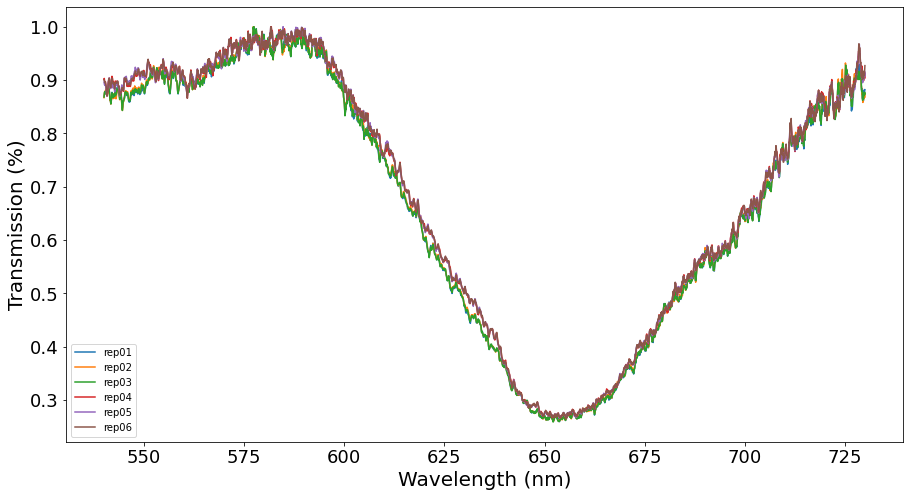

In [2]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = False
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = False

meta_df = csv.select_from_metadata('element', '01', meta_df)
meta_df = csv.select_from_metadata('fluid', 'BeerCorny1', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)

## Bulk Process
copy one dataset into another, can also be used for modifying a folder structure

In [1]:
import os
import lib.csv_helpers as csv
import pandas as pd

path='./dummydata'
metapath = os.path.join(path, "index.txt")

setup_in = csv.get_default_setup()
setup_out = csv.get_default_setup()

setup_out['path'] = 'bulkmerge_output'
setup_out['subdirs'] = ['sensor', 'fluid']

csv.bulk_process(setup_in, setup_out, delete_input=False, merge_out=False)


ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-A02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-B02-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set correctly
ERROR:root:[Errno 2] No such file or directory: 'dummydata/instrument01/waterA/instrument01-C01-waterA.txt'
Row will be removed from output metadata file
Check that setup_in['subdirs'] is set 

## Single Measurements

Run some dummy measurements at various wavelengths to check they merge correctly

In [18]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
element = 'A02'
fluid = 'asdf'

setup['wavelength_range'] = [400, 420, 0.5]
csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
setup['wavelength_range'] = [390, 410, 0.5]
df = csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
df




INFO:root:Saving into new file dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/instrument01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt


,wavelength,1647256382.994453,1647256383.020605
0,390.0,NaN,0.934341
1,390.5,NaN,0.159506
2,391.0,NaN,0.485793
3,391.5,NaN,0.118181
4,392.0,NaN,0.181326
5,392.5,NaN,0.432854
6,393.0,NaN,0.744847
7,393.5,NaN,0.435029
8,394.0,NaN,0.910408
9,394.5,NaN,0.973651


In [7]:
import time
import numpy as np

# import the usb driver
import stellarnet_mac.stellarnet_driver3 as sn

import logging
logging.basicConfig(format='%(asctime)s %(message)s')

def getSpectrum(spectrometer, wav, inttime, scansavg, smooth):
    logging.warning('requesting spectrum')
    spectrometer['device'].set_config(int_time=inttime, scans_to_avg=scansavg, x_smooth=smooth)
    spectrometer['device'].print_info()
    spectrum = sn.array_spectrum(spectrometer, wav)
    logging.warning('recieved spectrum')
    return spectrum
    
spectrometer, wav = sn.array_get_spec(0)


       
inttime = 100
scansavg = 1
smooth = 1 

logging.warning('displaying spectrum')
data=getSpectrum(spectrometer, wav, inttime, scansavg, smooth)
data



2022-03-18 14:16:53,270 displaying spectrum
2022-03-18 14:16:53,270 requesting spectrum


--- Device Information
idVendor:      0BD7
idProduct:     A012


USBError: [Errno 32] Pipe error

In [16]:
import pymongo

connection = pymongo.MongoClient('localhost', 27017)

database = connection['mydb_01']

collection = database['mycollection01']

data = {'name' : 'Calum'}

collection.insert_one(data)

collection.update_one

In [1]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()

csv.write_setup_json(setup)
csv.write_instrument_json(setup)

In [2]:
import lib.json_setup as json_setup
import lib.csv_helpers as csv

from pathlib import Path

setup = csv.get_default_setup()
setup['path'] = '/Users/calum/spectrometer/setups'
path = setup['path']
# json_setup.get_file_choice()
print(path)

json_setup.get_file_choice(path)

# Path('default_setup.json').stem


/Users/calum/spectrometer/setups
['gdefault_setup copy.json', 'adefault_setup copy 2.json', 'default_setup.json', 'fdefault_setup copy 2.json']
['default_sensor.json']
['default_element_map.json']
['default_layout.json']
['default_surface_map.json']
['default_output_config.json']
['default_input_config.json']
['default_instrument.json']


{'setups': ['gdefault_setup copy',
  'adefault_setup copy 2',
  'default_setup',
  'fdefault_setup copy 2'],
 'sensors': ['default_sensor'],
 'element_maps': ['default_element_map'],
 'layouts': ['default_layout'],
 'surface_maps': ['default_surface_map'],
 'output_configs': ['default_output_config'],
 'input_configs': ['default_input_config'],
 'instruments': ['default_instrument']}

In [4]:
py_list = ['e', 'a', 'u', 'O', 'i']
print(sorted(py_list))

['O', 'a', 'e', 'i', 'u']
